In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os
import sys

In [17]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [18]:
from scripts.load_data import load_data
news_path = '../Data/raw_analyst_ratings.csv'
stock_path = '../Data/META_historical_data.csv'
aligned_data = load_data(news_path, stock_path)
# stock_data = stock_data.rename(columns={'Date': 'date'})

In [19]:
aligned_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,232.110001,232.649994,228.529999,230.160004,229.688019,15380300,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,239.770004,240.899994,231.669998,232.199997,231.723816,33178300,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,231.509995,235.990005,228.740005,234.910004,234.428268,33925600,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,231.509995,235.990005,228.740005,234.910004,234.428268,33925600,0.0,0.0


In [20]:
# from scripts.sentiment import get_sentiment, apply_sentiment_analysis
from scripts.analyze_sentiment import analyze_and_display_sentiment
analyze_and_display_sentiment(aligned_data, 'headline')
aligned_data.head()

                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


,Unnamed: 0,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,232.110001,232.649994,228.529999,230.160004,229.688019,15380300,0.0,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,239.770004,240.899994,231.669998,232.199997,231.723816,33178300,0.0,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,231.509995,235.990005,228.740005,234.910004,234.428268,33925600,0.0,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,231.509995,235.990005,228.740005,234.910004,234.428268,33925600,0.0,0.0,0.0


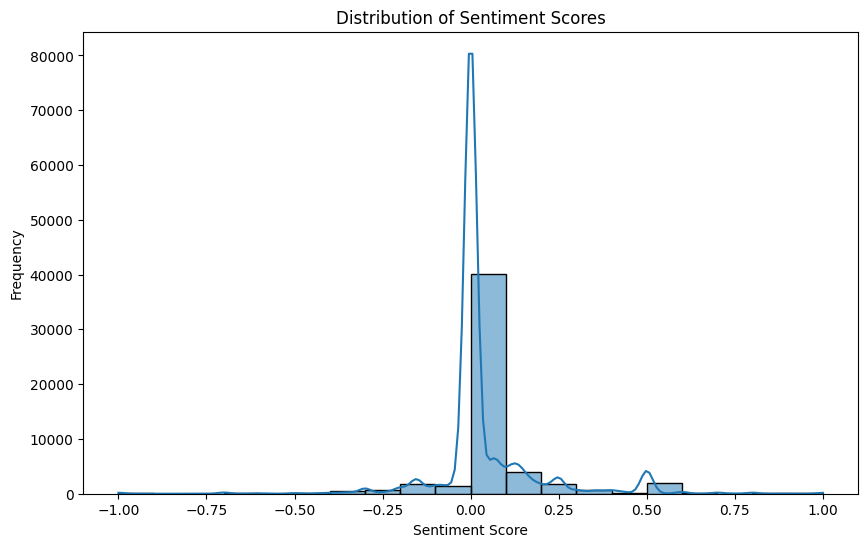

In [21]:
from scripts.plot_sentiment import plot_sentiment_distribution
plot_sentiment_distribution(aligned_data)

In [22]:
from scripts.calculate_daily_returns import calculate_daily_returns
calculate_daily_returns(aligned_data)
# Drop the first row with NaN values due to pct_change()
aligned_data = aligned_data.dropna()
print(aligned_data[['date', 'Close', 'daily_return']].head())


         date       Close  daily_return
1  2020-06-03  230.160004     -0.002643
2  2020-05-26  232.199997      0.008863
3  2020-05-22  234.910004      0.011671
4  2020-05-22  234.910004      0.000000
5  2020-05-22  234.910004      0.000000


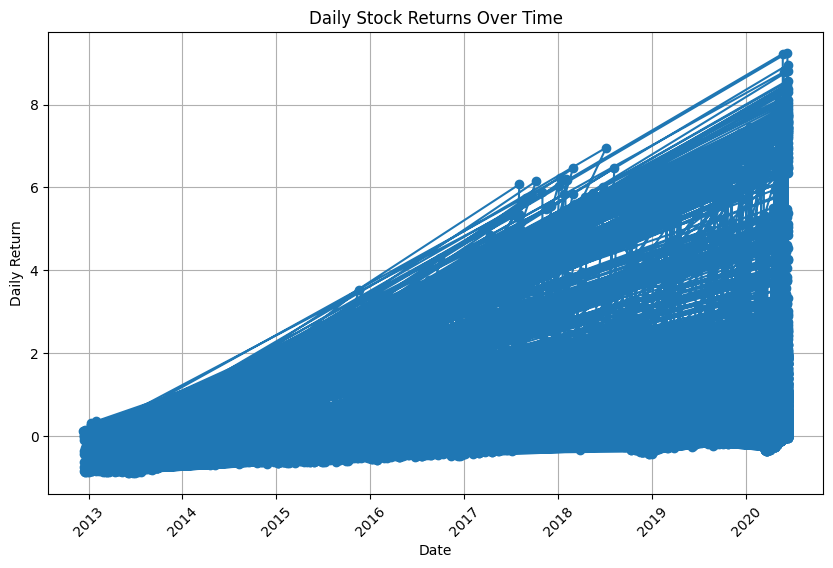

In [23]:
from scripts.plot_daily_returns_over_time import plot_daily_returns_over_time
plot_daily_returns_over_time(aligned_data)

In [24]:
from scripts.calculate_daily_sentiment_and_merge import calculate_daily_sentiment_and_merge
final_data = calculate_daily_sentiment_and_merge(aligned_data)
final_data.head()

,date,sentiment,daily_return
0,2012-12-12,0.000000,0.116147
1,2012-12-13,0.008333,-0.441013
2,2012-12-13,0.008333,0.081578
3,2012-12-13,0.008333,0.026163
4,2012-12-13,0.008333,-0.373002


In [25]:
correlation = final_data['sentiment'].corr(final_data['daily_return'])
print(f"Correlation between daily sentiment scores and stock returns: {correlation}")


Correlation between daily sentiment scores and stock returns: -0.016346489074216628


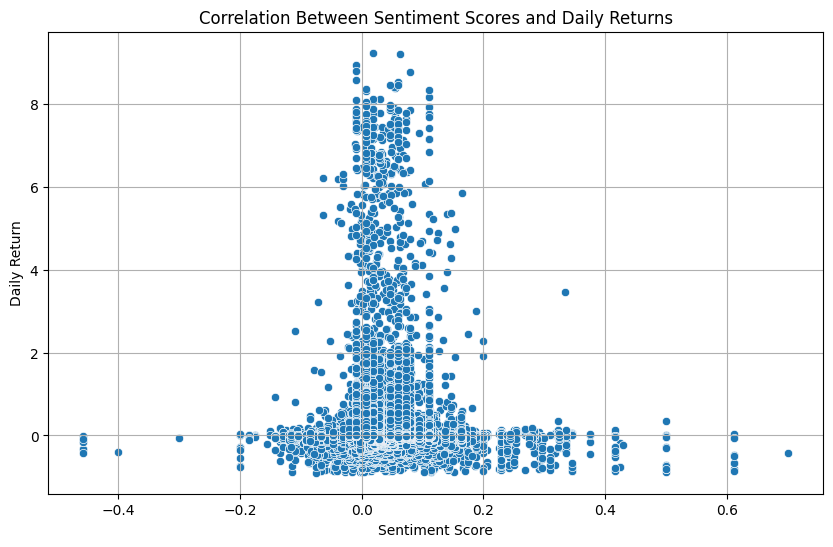

In [26]:
from scripts.plot_sentiment_vs_daily_return import plot_sentiment_vs_daily_return
plot_sentiment_vs_daily_return(final_data)

ADD VISUALIZATIONS

In [27]:
# Calculate rolling averages
window_size = 7  # Number of days for rolling average

final_data['rolling_sentiment'] = final_data['sentiment'].rolling(window=window_size).mean()
final_data['rolling_return'] = final_data['daily_return'].rolling(window=window_size).mean()


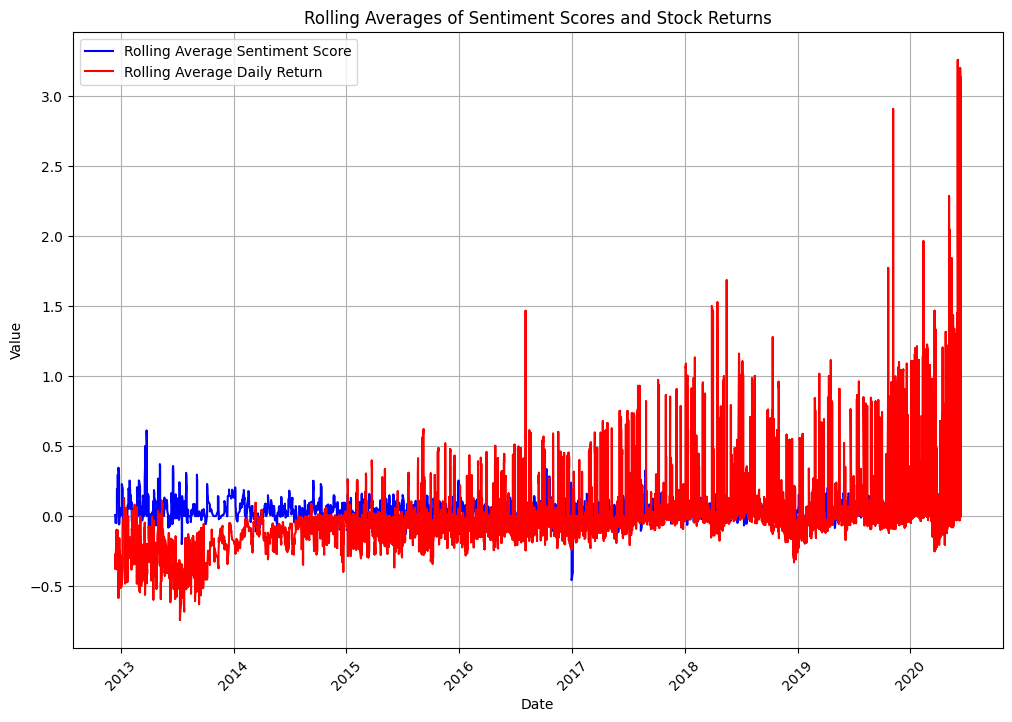

In [28]:
from scripts.plot_rolling_averages import plot_rolling_averages
plot_rolling_averages(final_data)

In [29]:
correlation_matrix = final_data[['sentiment', 'daily_return']].corr()

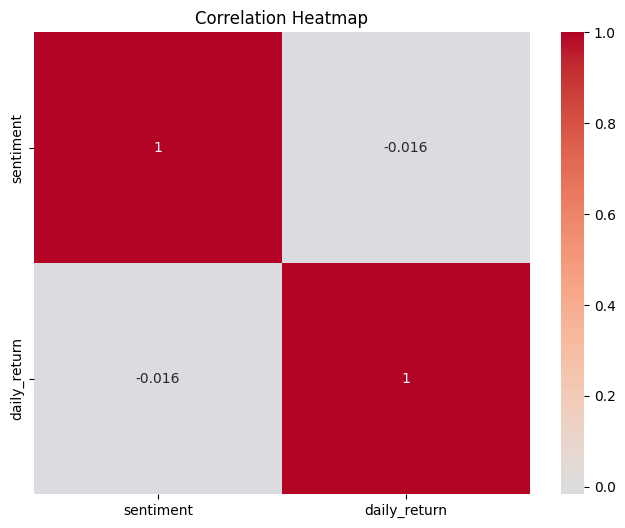

In [30]:
from scripts.plot_correlation_heatmap import plot_correlation_heatmap
plot_correlation_heatmap(correlation_matrix)